<a href="https://colab.research.google.com/github/Maxc390/Sierpinski-triangle-w-Python-OpenGL-Blender/blob/main/Road_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load the Data

In [ ]:
import pandas as pd

# Load the dataset from the uploaded Excel file
file_path = '/content/TRAFFIC ACCIDENTS DATA.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows and basic information about the data
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          80 non-null     datetime64[ns]
 1   Accident Spot                 81 non-null     object        
 2   Area                          81 non-null     object        
 3   County                        81 non-null     object        
 4   Road/ Highway                 80 non-null     object        
 5   Brief Accident Details/Cause  79 non-null     object        
 6   Victims                       63 non-null     object        
 7   Total people confirmed dead   72 non-null     object        
 8   Time of the Accidents         25 non-null     object        
 9   Weather conditions            1 non-null      object        
dtypes: datetime64[ns](1), object(9)
memory usage: 6.5+ KB


(        Date Accident Spot      Area     County                Road/ Highway  \
 0 2023-08-08         Sobea     Sobea     Nakuru       Nakuru-Eldoret Highway   
 1 2023-08-07    Maai-Mahiu  Naivasha     Nakuru  Maai-Mahiu Naivasha Highway   
 2 2023-07-25       Ntulele   Ntulele      Narok         Narok Mai Mahiu road   
 3 2022-12-02         Suswa     Suswa      Narok         Narok Mai Mahiu road   
 4 2022-12-01        Mutira    Mutira  Kirinyaga       Kerugoya-Karatina Road   
 
        Brief Accident Details/Cause                Victims  \
 0                 Head on Collision             Passengers   
 1  vehicle and motorcycle collision             Passengers   
 2                 Head on Collision      Drivers/Occupants   
 3                 Head on Collision  Driver and passengers   
 4                          Run over             Pedestrian   
 
   Total people confirmed dead Time of the Accidents Weather conditions  
 0                           4               4.30 pm      

# Clean and preprocess the dataset

In [ ]:
# Clean and preprocess the dataset
# Convert "Total people confirmed dead" to numeric, filling missing values with zeroes (assuming no fatalities if missing)
data['Total people confirmed dead'] = pd.to_numeric(data['Total people confirmed dead'], errors='coerce').fillna(0)

# Define safety level based on "Total people confirmed dead"
# Dangerous: >= 3 deaths, Moderate: 1-2 deaths, Safe: 0 deaths
def safety_level(deaths):
    if deaths >= 3:
        return 'Dangerous'
    elif deaths >= 1:
        return 'Moderate'
    else:
        return 'Safe'

data['Safety Level'] = data['Total people confirmed dead'].apply(safety_level)

# Drop irrelevant or mostly missing columns for classification purposes
data_cleaned = data.drop(columns=['Date', 'Accident Spot', 'Time of the Accidents', 'Weather conditions'])

# Fill remaining missing values with 'Unknown' for categorical data
data_cleaned = data_cleaned.fillna('Unknown')

# Encode categorical features and separate the target variable
X = pd.get_dummies(data_cleaned.drop(columns=['Safety Level', 'Total people confirmed dead']), drop_first=True)
y = data_cleaned['Safety Level']

# Display the cleaned data and encoded feature set
data_cleaned.head(), X.head(), y.head()


(       Area     County                Road/ Highway  \
 0     Sobea     Nakuru       Nakuru-Eldoret Highway   
 1  Naivasha     Nakuru  Maai-Mahiu Naivasha Highway   
 2   Ntulele      Narok         Narok Mai Mahiu road   
 3     Suswa      Narok         Narok Mai Mahiu road   
 4    Mutira  Kirinyaga       Kerugoya-Karatina Road   
 
        Brief Accident Details/Cause                Victims  \
 0                 Head on Collision             Passengers   
 1  vehicle and motorcycle collision             Passengers   
 2                 Head on Collision      Drivers/Occupants   
 3                 Head on Collision  Driver and passengers   
 4                          Run over             Pedestrian   
 
    Total people confirmed dead Safety Level  
 0                          4.0    Dangerous  
 1                          1.0     Moderate  
 2                          4.0    Dangerous  
 3                          3.0    Dangerous  
 4                          1.0     Moderate  ,

# Split the data into training (80%), validation (10%), and test (10%) sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%), validation (10%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Output the shapes of the splits to verify
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((64, 206), (8, 206), (9, 206), (64,), (8,), (9,))

#Train Different Models and Pick the one with best accuracy


Logistic 
 Regression Validation Classification Report:

              precision    recall  f1-score   support

   Dangerous       0.75      0.75      0.75         4
    Moderate       0.00      0.00      0.00         2
        Safe       0.67      1.00      0.80         2

    accuracy                           0.62         8
   macro avg       0.47      0.58      0.52         8
weighted avg       0.54      0.62      0.57         8


Unique predictions for Logistic 
 Regression: {'Moderate', 'Safe', 'Dangerous'}

Decision 
 Tree Validation Classification Report:

              precision    recall  f1-score   support

   Dangerous       1.00      1.00      1.00         4
    Moderate       1.00      0.50      0.67         2
        Safe       0.67      1.00      0.80         2

    accuracy                           0.88         8
   macro avg       0.89      0.83      0.82         8
weighted avg       0.92      0.88      0.87         8


Unique predictions for Decision 
 Tree: {'Dang

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Unique predictions for Naive 
 Bayes: {'Moderate', 'Safe', 'Dangerous'}

Support 
 Vector 
 Machine Validation Classification Report:

              precision    recall  f1-score   support

   Dangerous       0.57      1.00      0.73         4
    Moderate       0.00      0.00      0.00         2
        Safe       1.00      0.50      0.67         2

    accuracy                           0.62         8
   macro avg       0.52      0.50      0.46         8
weighted avg       0.54      0.62      0.53         8


Unique predictions for Support 
 Vector 
 Machine: {'Dangerous', 'Safe'}

K-Nearest 
 Neighbors Validation Classification Report:

              precision    recall  f1-score   support

   Dangerous       0.60      0.75      0.67         4
    Moderate       0.50      0.50      0.50         2
        Safe       0.00      0.00      0.00         2

    accuracy                           0.50         8
   macro avg       0.37      0.42      0.39         8
weighted avg       0.42  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Neural 
 Network Validation Classification Report:

              precision    recall  f1-score   support

   Dangerous       0.75      0.75      0.75         4
    Moderate       0.00      0.00      0.00         2
        Safe       0.33      0.50      0.40         2

    accuracy                           0.50         8
   macro avg       0.36      0.42      0.38         8
weighted avg       0.46      0.50      0.47         8


Unique predictions for Neural 
 Network: {'Moderate', 'Safe', 'Dangerous'}


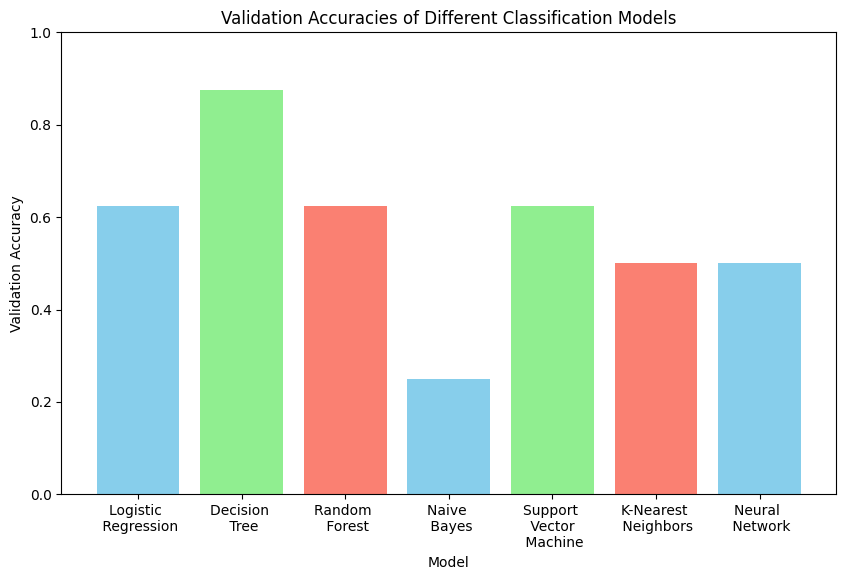

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Initialize models
models = {
    "Logistic \n Regression": LogisticRegression(max_iter=200, random_state=42),
    "Decision \n Tree": DecisionTreeClassifier(random_state=42),
    "Random \n Forest": RandomForestClassifier(random_state=42),
    "Naive \n Bayes": GaussianNB(),
    "Support \n Vector \n Machine": SVC(random_state=42),
    "K-Nearest \n Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Logistic \n Regression": LogisticRegression(max_iter=200, random_state=42),
    "Neural \n Network": MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=300, random_state=42)
}

# Train models and evaluate on validation set
validation_accuracies = {}
for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predict on validation set
    y_val_pred = model.predict(X_val)

    # Calculate accuracy and save it
    accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies[model_name] = accuracy

    # Display classification report for each model
    print(f"\n{model_name} Validation Classification Report:\n")
    print(classification_report(y_val, y_val_pred))
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    print(f"\nUnique predictions for {model_name}: {set(y_val_pred)}")


# Plot validation accuracies
plt.figure(figsize=(10, 6))
plt.bar(validation_accuracies.keys(), validation_accuracies.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel("Model")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracies of Different Classification Models")
plt.ylim(0, 1)
plt.show()


#Plot the ROC Curve for the different Models

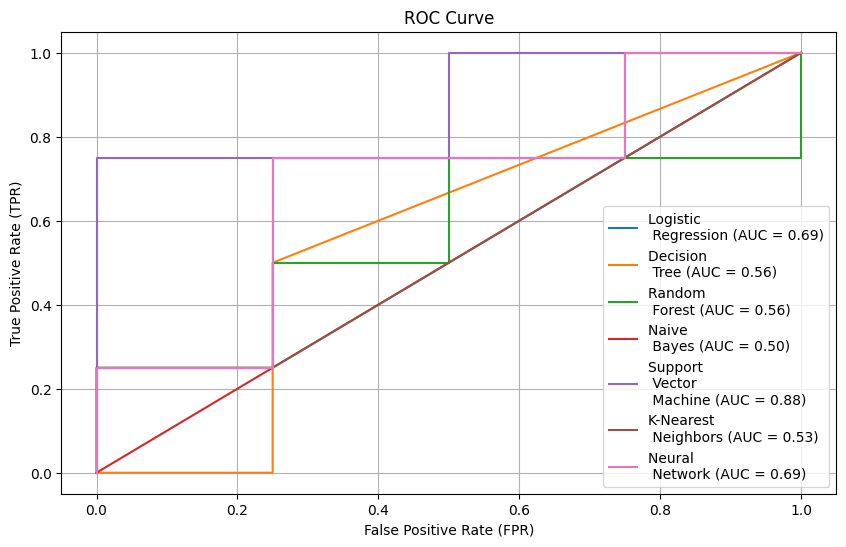

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Convert y_val to binary for the 'Dangerous' class
y_val_binarized = (y_val == "Dangerous").astype(int)

plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    try:
        # Use probabilities or decision function
        if hasattr(model, "predict_proba"):  # Probability prediction
            y_val_prob = model.predict_proba(X_val)[:, 1]  # Positive class probabilities
        elif hasattr(model, "decision_function"):  # Decision function
            if isinstance(model.classes_, list):
                class_index = model.classes_.index("Dangerous")
            else:
                class_index = list(model.classes_).index("Dangerous")
            y_val_prob = model.decision_function(X_val)[:, class_index]
        else:
            print(f"{model_name} does not support probability prediction.")
            continue

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_val_binarized, y_val_prob)
        auc_score = roc_auc_score(y_val_binarized, y_val_prob)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

    except Exception as e:
        print(f"Error with {model_name}: {e}")
        continue

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

for model_name, model in models.items():
    y_val_pred = model.predict(X_val)
    tn, fp, fn, tp = confusion_matrix(y_val == "Dangerous", y_val_pred == "Dangerous").ravel()
    specificity = tn / (tn + fp)
    print(f"{model_name} Specificity: {specificity:.2f}")


Logistic 
 Regression Specificity: 0.75
Decision 
 Tree Specificity: 1.00
Random 
 Forest Specificity: 0.50
Naive 
 Bayes Specificity: 0.75
Support 
 Vector 
 Machine Specificity: 0.25
K-Nearest 
 Neighbors Specificity: 0.50
Neural 
 Network Specificity: 0.75


#Plotting the Metrics for Decision Tree

Accuracy: 0.88
Precision: 1.00
Recall (Sensitivity): 1.00
Specificity: 1.00
F1-Score: 1.00
AUC: 0.56


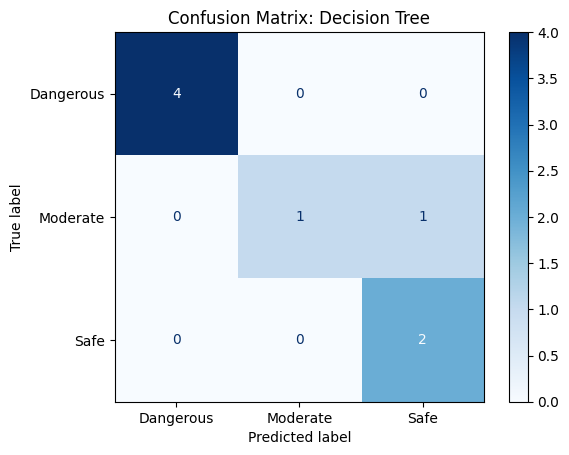

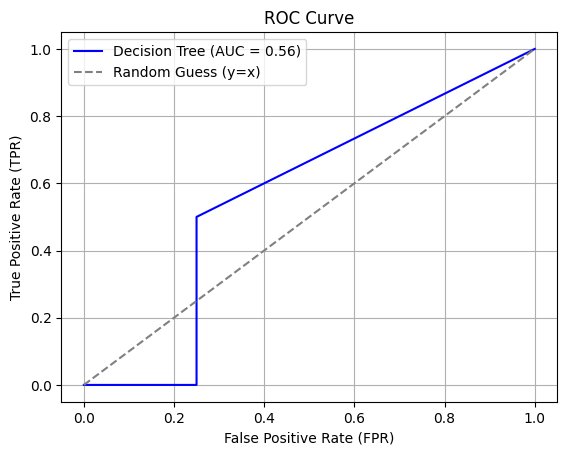

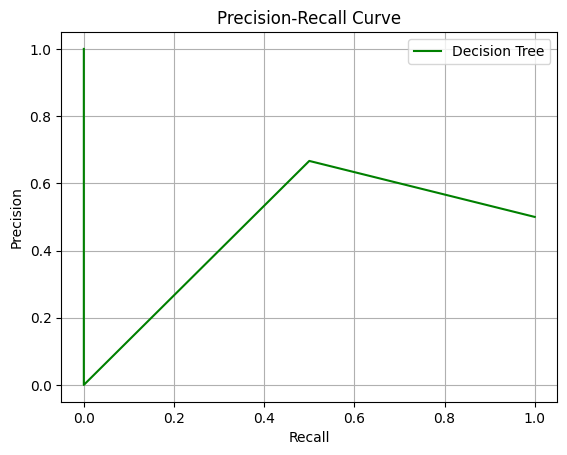

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt
import numpy as np

# Get predictions and probabilities from the Decision Tree model
decision_tree = models["Decision \n Tree"]
y_val_pred = decision_tree.predict(X_val)
y_val_prob = decision_tree.predict_proba(X_val)[:, 1]  # Probability for 'Dangerous' class

# Binarize y_val for 'Dangerous' class
y_val_binarized = (y_val == "Dangerous").astype(int)

# Compute metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val_binarized, (y_val_pred == "Dangerous").astype(int))
recall = recall_score(y_val_binarized, (y_val_pred == "Dangerous").astype(int))
f1 = f1_score(y_val_binarized, (y_val_pred == "Dangerous").astype(int))
specificity = recall_score(y_val_binarized, (y_val_pred == "Dangerous").astype(int), pos_label=0)
auc_score = roc_auc_score(y_val_binarized, y_val_prob)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc_score:.2f}")

# Plot confusion matrix
cm = confusion_matrix(y_val, y_val_pred, labels=decision_tree.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix: Decision Tree")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val_binarized, y_val_prob)
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (y=x)')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Plot Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_val_binarized, y_val_prob)
plt.plot(recall_vals, precision_vals, label="Decision Tree", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


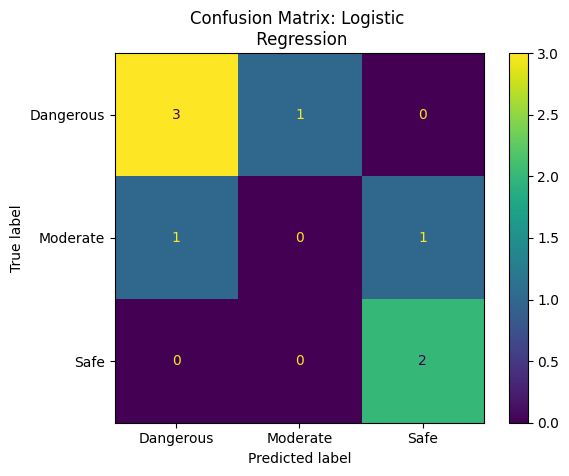

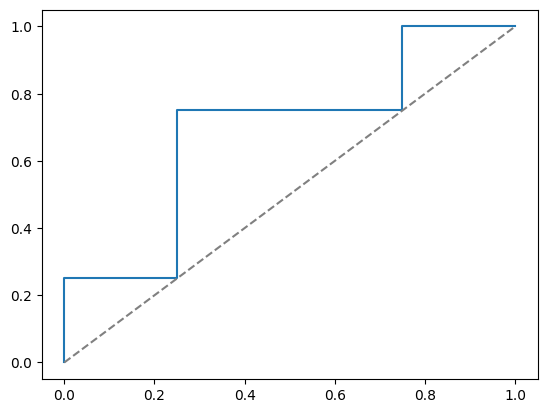

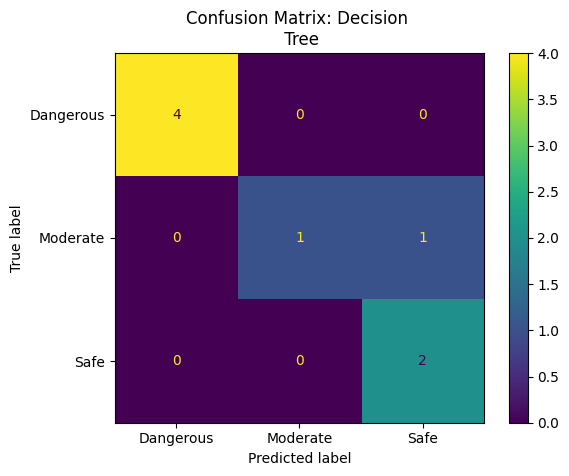

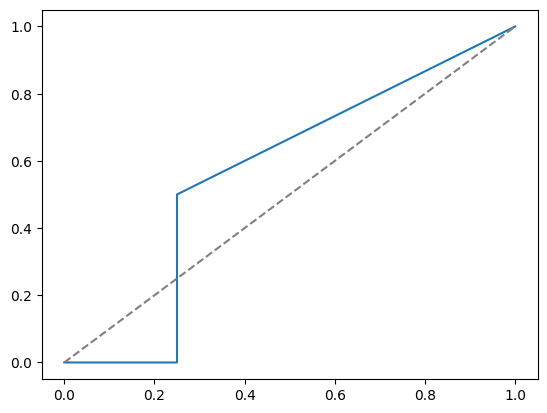

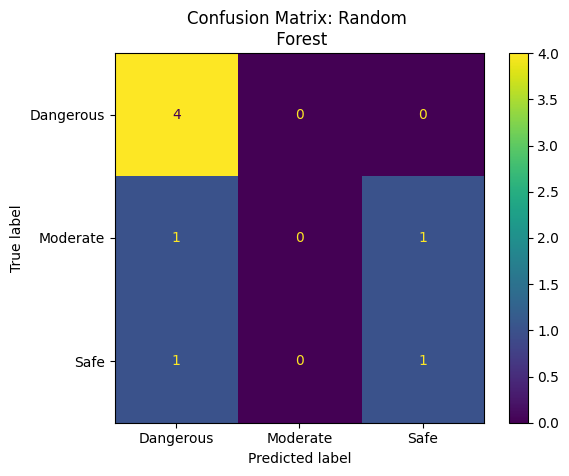

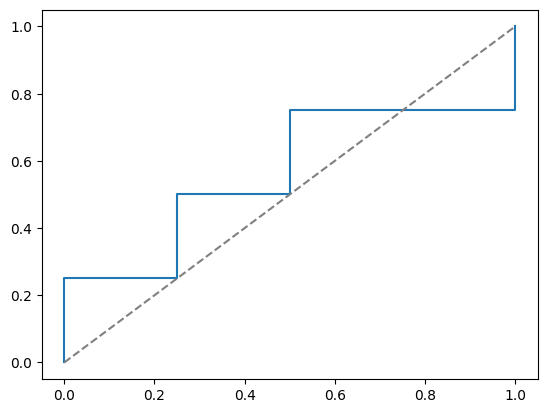

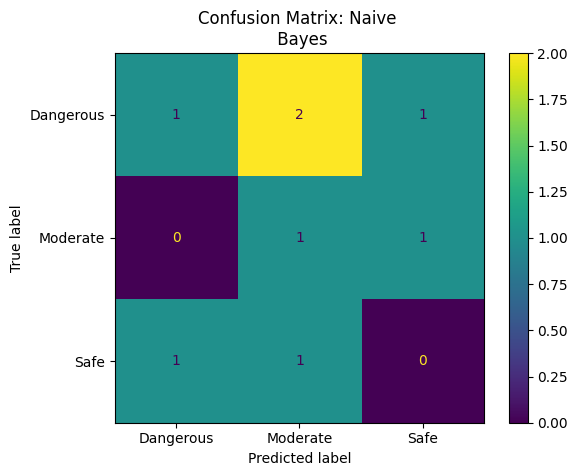

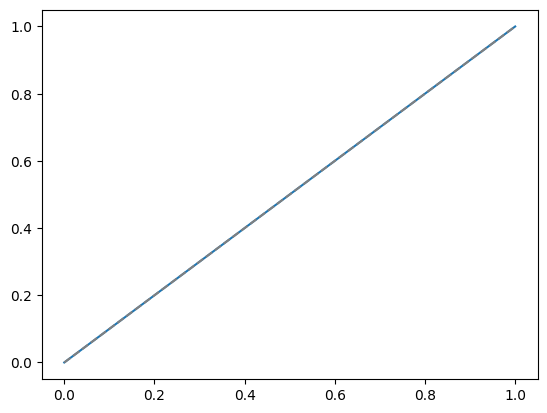

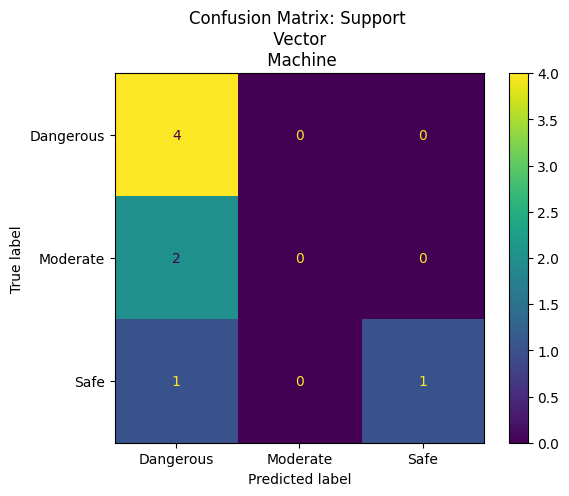

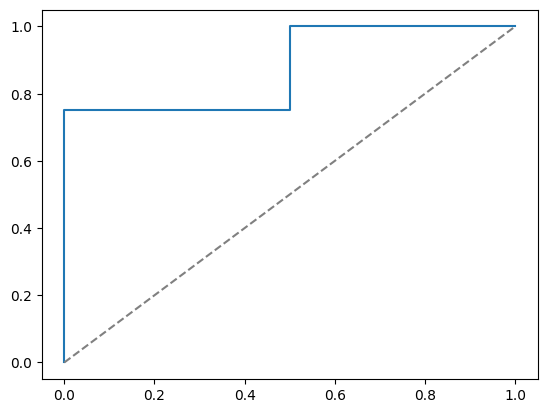

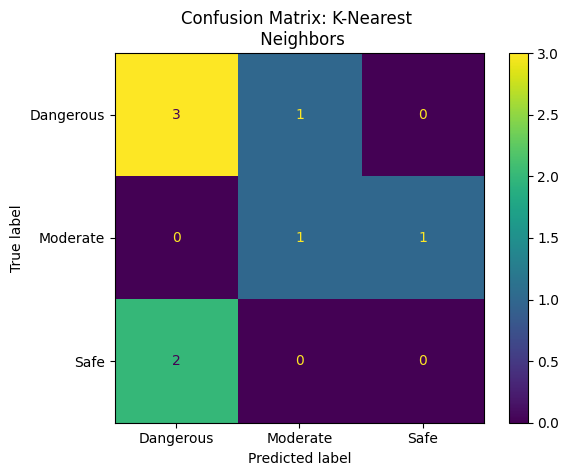

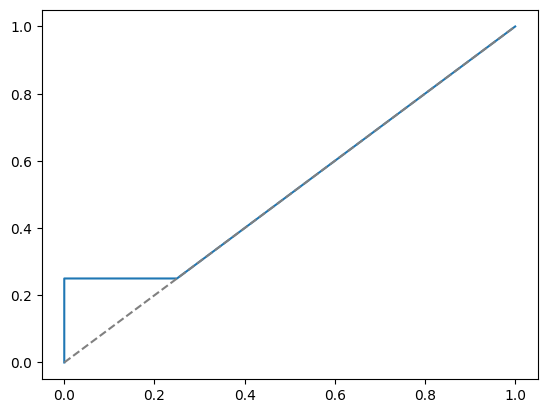

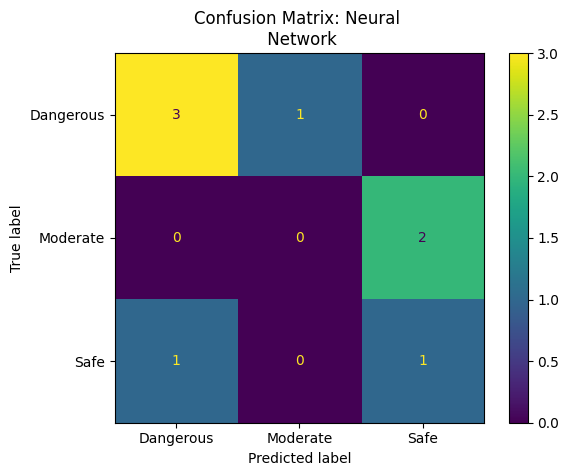

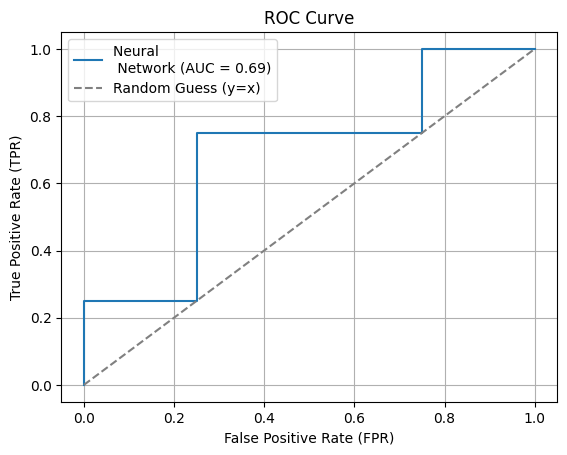

                          Model  Accuracy  Precision  Recall  F1-Score  \
0        Logistic \n Regression     0.625   0.750000    0.75  0.750000   
1              Decision \n Tree     0.875   1.000000    1.00  1.000000   
2              Random \n Forest     0.625   0.666667    1.00  0.800000   
3                Naive \n Bayes     0.250   0.500000    0.25  0.333333   
4  Support \n Vector \n Machine     0.625   0.571429    1.00  0.727273   
5        K-Nearest \n Neighbors     0.500   0.600000    0.75  0.666667   
6             Neural \n Network     0.500   0.750000    0.75  0.750000   

   Specificity      AUC  
0         0.75  0.68750  
1         1.00  0.56250  
2         0.50  0.56250  
3         0.75  0.50000  
4         0.25  0.87500  
5         0.50  0.53125  
6         0.75  0.68750  


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt
import pandas as pd

# Convert y_val to binary for the 'Dangerous' class
y_val_binarized = (y_val == "Dangerous").astype(int)

# Dictionary to store all metrics
metrics_summary = []

# Evaluate each model
for model_name, model in models.items():
    try:
        # Predict probabilities or decision function
        if hasattr(model, "predict_proba"):
            y_val_prob = model.predict_proba(X_val)[:, 1]
        elif hasattr(model, "decision_function"):
            if isinstance(model.classes_, list):
                class_index = model.classes_.index("Dangerous")
            else:
                class_index = list(model.classes_).index("Dangerous")
            y_val_prob = model.decision_function(X_val)[:, class_index]
        else:
            print(f"{model_name} does not support probability prediction.")
            continue

        # Predict labels
        y_val_pred = model.predict(X_val)

        # Calculate metrics
        accuracy = accuracy_score(y_val, y_val_pred)
        precision = precision_score(y_val_binarized, y_val_pred == "Dangerous")
        recall = recall_score(y_val_binarized, y_val_pred == "Dangerous")
        f1 = f1_score(y_val_binarized, y_val_pred == "Dangerous")
        specificity = recall_score(y_val_binarized, y_val_pred == "Dangerous", pos_label=0)
        auc_score = roc_auc_score(y_val_binarized, y_val_prob)

        # Store metrics
        metrics_summary.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Specificity": specificity,
            "AUC": auc_score,
        })

        # Plot confusion matrix
        cm = confusion_matrix(y_val, y_val_pred, labels=model.classes_)
        ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()
        plt.title(f"Confusion Matrix: {model_name}")
        plt.show()

        # Plot ROC Curve
        fpr, tpr, _ = roc_curve(y_val_binarized, y_val_prob)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (y=x)')

    except Exception as e:
        print(f"Error with {model_name}: {e}")
        continue

# Plot consolidated ROC Curve
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Display metrics summary
metrics_df = pd.DataFrame(metrics_summary)
print(metrics_df)
